# Bike Rental Demand Prediction using Statistical Learning Methods

**Author:** Eddie Aguilar Ceballos  
**Date:** May 9, 2025

---

## Objectives

### General Objective
Develop a predictive model for bike rental demand using statistical learning techniques, comparing linear regression with tree-based methods to identify the most effective approach.

### Specific Objectives
1. Analyze the bike sharing dataset to identify patterns and relationships between features and rental demand
2. Implement and optimize a linear regression model, addressing potential regression problems 
3. Apply tree-based methods (regression trees, Random Forest, and XGBoost) to capture non-linear relationships in the data
4. Evaluate the performance of each model using cross-validation and appropriate metrics
5. Compare the effectiveness of different models in predicting bike rental demand
6. Implement ensemble methods to improve prediction accuracy
7. Identify the most influential factors affecting bike rental demand

---

## Theoretical Framework

### Linear Regression
Linear regression is a fundamental statistical learning method used to model the relationship between a quantitative response variable Y and one or more predictor variables X. The standard linear regression model can be expressed as:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε

Where:
- Y is the response variable (in our case, bike rental count)
- X₁, X₂, ..., Xₚ are predictor variables (weather conditions, time, etc.)
- β₀, β₁, β₂, ..., βₚ are the model coefficients
- ε is the error term

Linear regression works by finding the values of β that minimize the residual sum of squares (RSS):

RSS = Σ(yᵢ - ŷᵢ)² = Σ(yᵢ - (β₀ + β₁xᵢ₁ + β₂xᵢ₂ + ... + βₚxᵢₚ))²

The method assumes that the relationship between the predictors and response is linear, which may not always be the case. Additionally, it assumes that the error terms are uncorrelated with constant variance (James et al., 2023).

### Six Potential Problems in Linear Regression

Despite its simplicity and interpretability, linear regression can encounter several issues that affect model performance:

1. **Non-linearity of the response-predictor relationships**: If the true relationship between predictors and response is not linear, the linear model will fail to capture the underlying pattern. Solutions include transformation of variables (logarithmic, polynomial) or using more flexible models like regression splines or tree-based methods.

2. **Correlation of error terms**: In time series data like bike rentals, error terms from adjacent observations may be correlated. This violates the assumption of independent errors and can lead to misleading standard errors and confidence intervals. Time series methods or including lagged variables may help address this issue.

3. **Non-constant variance of error terms (heteroscedasticity)**: When the variance of errors changes across the range of predictor values, it affects the reliability of hypothesis tests and confidence intervals. Solutions include variance-stabilizing transformations (like log transformations) or weighted least squares regression.

4. **Outliers**: Extreme values in the response variable can disproportionately influence the regression model, pulling the line toward them and distorting the relationship. Robust regression methods or removal of outliers after careful consideration can address this issue.

5. **High-leverage points**: Observations with extreme predictor values have high potential to influence the regression model. Their impact can be assessed using leverage statistics and addressed through careful analysis or robust methods.

6. **Collinearity**: When predictor variables are highly correlated, it becomes difficult to separate their individual effects on the response. This leads to unstable coefficient estimates with high standard errors. Solutions include variable selection, ridge regression, principal component regression, or simply removing some of the collinear variables (James et al., 2023).

### Regression Trees

Regression trees divide the predictor space into distinct regions and fit a constant model (typically the mean response) within each region. The process works by recursively splitting the data to minimize the RSS within each resulting region.

Advantages of regression trees include:
- Capturing non-linear relationships
- Handling interactions automatically
- Being easy to interpret
- Requiring minimal data preprocessing

However, they can suffer from high variance and overfitting. The prediction function for a regression tree can be expressed as:

f(X) = Σₘ cₘ · I(X ∈ Rₘ)

Where Rₘ represents the M terminal regions and cₘ is the prediction value (typically the mean response) in region m (James et al., 2023).

### Classification Trees

While our project focuses on regression, classification trees follow a similar structure but are designed for categorical responses. Instead of minimizing RSS, classification trees typically use metrics like Gini impurity or entropy to determine splits.

### Bootstrap

Bootstrap is a resampling technique that creates multiple datasets by randomly sampling with replacement from the original dataset. Each bootstrap sample has the same size as the original data but contains some observations multiple times and omits others.

This technique is valuable for:
- Estimating the uncertainty of a statistic
- Improving model stability
- Forming the foundation for ensemble methods like bagging and random forests

The bootstrap principle allows us to approximate the sampling distribution of a statistic without making distributional assumptions (James et al., 2023).

### Ensemble of Models

Ensemble methods combine multiple models to improve predictive performance. The key idea is that by aggregating predictions from several models, we can reduce variance and potentially bias, leading to better overall performance.

### Bagging (Bootstrap Aggregating)

Bagging applies the bootstrap method to create multiple training sets, trains a separate model on each, and then averages their predictions (for regression) or takes a majority vote (for classification).

For regression:
f̂bag(x) = (1/B) Σᵦ f̂ᵇ(x)

Where B is the number of bootstrap samples and f̂ᵇ is the prediction from the model trained on the bth bootstrap sample.

Bagging reduces variance but doesn't affect bias. It's particularly effective for high-variance models like decision trees (James et al., 2023).

### Random Forests

Random Forests extend bagging by introducing additional randomness. When building each tree, only a random subset of the features is considered for each split. This decorrelates the trees, further reducing variance.

For regression:
f̂rf(x) = (1/B) Σᵦ f̂ᵇ(x)

Random Forests typically outperform individual decision trees and often bagging as well, due to the reduced correlation between trees (James et al., 2023).

### Boosting

Unlike bagging, which builds models independently, boosting builds models sequentially. Each new model focuses on the errors made by the previous models. In gradient boosting:

1. Initialize f̂₀(x) = 0
2. For b = 1 to B:
   a. Compute residuals rᵢ = yᵢ - f̂ᵇ₋₁(xᵢ)
   b. Fit a model fᵇ to the residuals
   c. Update f̂ᵇ(x) = f̂ᵇ₋₁(x) + λfᵇ(x)

Where λ is the learning rate that controls how quickly the model adapts.

XGBoost is an optimized implementation of gradient boosting that includes regularization terms and other improvements for speed and performance (James et al., 2023).

---

## Dataset Analysis

### Origin of the Dataset

The Bike Sharing dataset comes from the UCI Machine Learning Repository and contains daily and hourly count data of rental bikes from the Capital Bikeshare system in Washington, D.C., along with corresponding weather and seasonal information. The data covers a two-year period from 2011 to 2012. This dataset was compiled by Hadi Fanaee-T at the University of Porto and has been made available on Kaggle for data science projects.

### Dataset Content

The dataset includes the following key features:

1. **Temporal information**:
   - datetime: Date and hour (for hourly data)
   - season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
   - year: 0 for 2011, 1 for 2012
   - month: Month of the year (1-12)
   - weekday: Day of the week
   - holiday: Whether the day is a holiday
   - workingday: Whether the day is neither a weekend nor holiday

2. **Weather conditions**:
   - temp: Normalized temperature in Celsius
   - atemp: Normalized feeling temperature in Celsius
   - humidity: Normalized humidity
   - windspeed: Normalized wind speed
   - weathersit: Weather situation (1: Clear, 2: Mist/Cloudy, 3: Light rain/snow, 4: Heavy rain/snow)

3. **Target variables**:
   - casual: Count of casual users
   - registered: Count of registered users
   - cnt: Total count of bike rentals (casual + registered) - This is our main prediction target

### Sample Information

The dataset contains daily records over a two-year period, with a total of approximately 732 observations. Each observation represents the number of bike rentals in a specific day, along with the corresponding weather and temporal conditions. This rich temporal and environmental information provides a solid foundation for building predictive models.

### Analysis Objectives

With this dataset, we aim to analyze:

1. The relationship between weather conditions and bike rental demand
2. Temporal patterns in bike usage (daily, weekly, seasonal cycles)
3. The effect of holidays and working days on rental patterns
4. How temperature and other weather factors interact to influence demand
5. Which features are most important in predicting bike rental counts

### Expected Results from Model Fitting

When applying predictive models to this dataset, we expect to find:

- Complex non-linear relationships between features (especially weather variables) and bike rental demand
- Strong temporal patterns (daily, weekly, and seasonal cycles) that influence rental behavior

We anticipate that models capable of capturing non-linear relationships and interactions will perform better than simpler models. However, a well-tuned linear regression with appropriate transformations and adjustments for the potential regression problems could still provide competitive performance. The model comparison will help us identify which approach best balances predictive accuracy with interpretability for this particular bike rental prediction task.

---

## Implementation

In [84]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import optuna
import warnings
warnings.filterwarnings('ignore')

# Setting random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Better readability
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

### Data preparation

In [85]:
# Load the bike sharing dataset
df = pd.read_csv(r"C:\Users\AgJo413\Documents\GitHub\bike_rental_ml_forecast\data\raw\day.csv") 

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.info()

# Display the first few rows of the dataset
df.head()

Dataset shape: (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


### Data analysis and visualization

In [86]:
# Summary 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,366.0000,2.4966,0.5007,6.5198,0.0287,2.9973,0.6840,1.3953,0.4954,0.4744,0.6279,0.1905,848.1765,3656.1724,4504.3488
std,211.1658,1.1108,0.5003,3.4519,0.1672,2.0048,0.4652,0.5449,0.1831,0.1630,0.1424,0.0775,686.6225,1560.2564,1937.2115
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0591,0.0791,0.0000,0.0224,2.0000,20.0000,22.0000
25%,183.5000,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,0.3371,0.3378,0.5200,0.1349,315.5000,2497.0000,3152.0000
50%,366.0000,3.0000,1.0000,7.0000,0.0000,3.0000,1.0000,1.0000,0.4983,0.4867,0.6267,0.1810,713.0000,3662.0000,4548.0000
75%,548.5000,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,0.6554,0.6086,0.7302,0.2332,1096.0000,4776.5000,5956.0000
max,731.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,0.8617,0.8409,0.9725,0.5075,3410.0000,6946.0000,8714.0000


In [87]:
# Check for missing values
print("Missing values by column:")
print(df.isnull().sum())

Missing values by column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


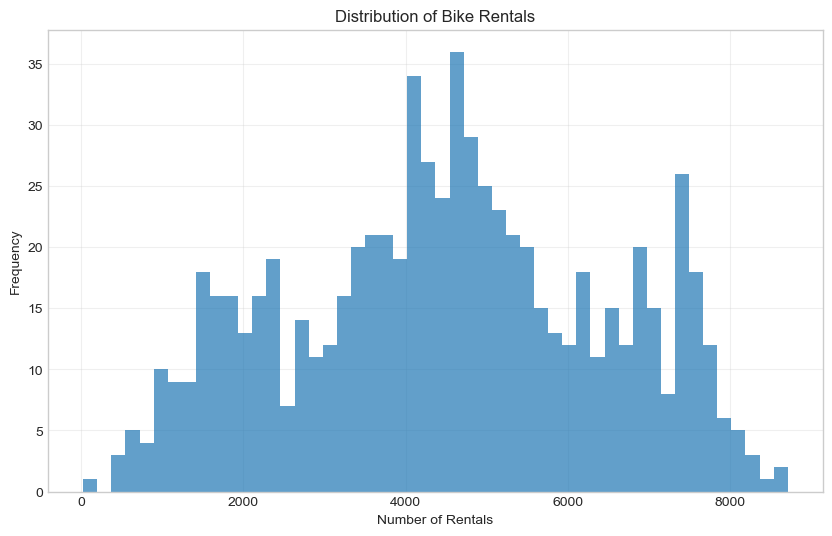

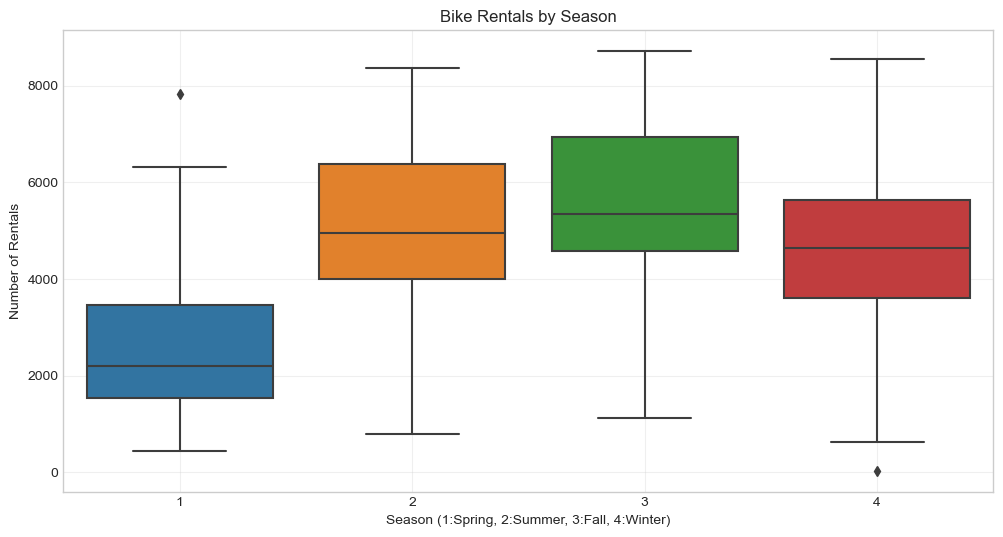

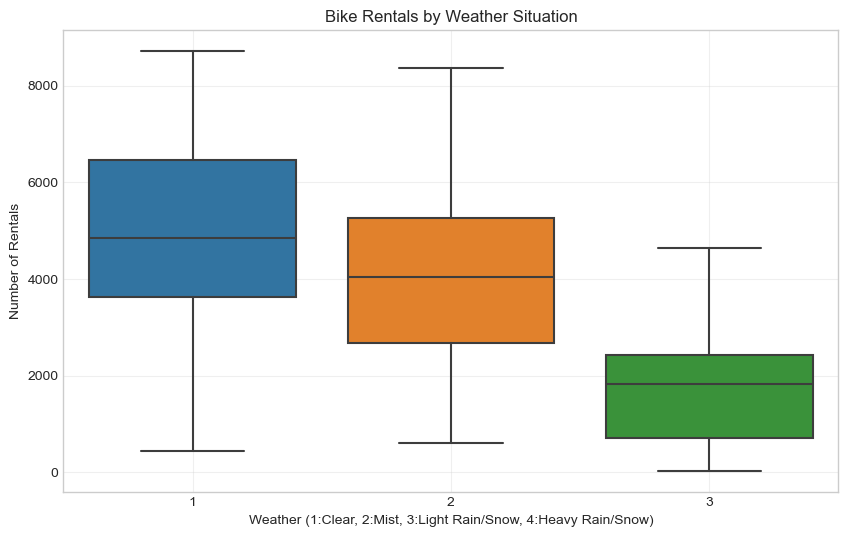

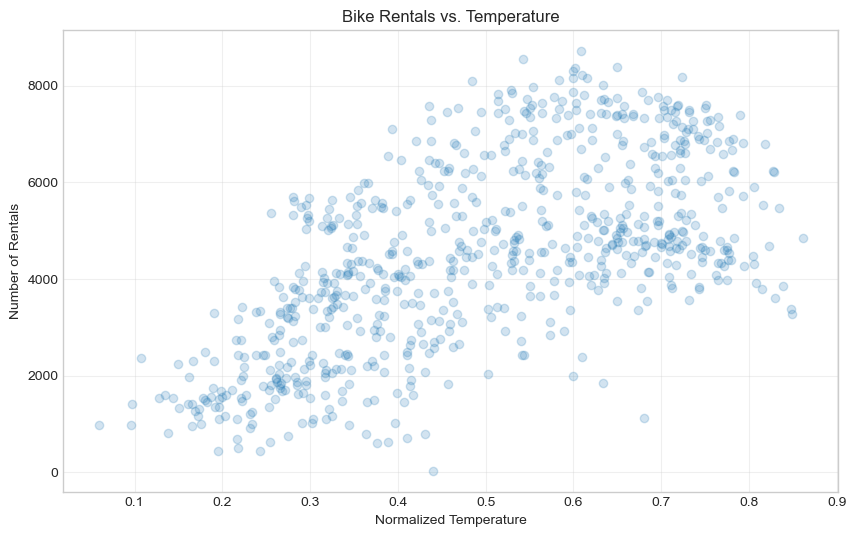

In [88]:
# Distribution of our target variable (bike rentals)
plt.figure(figsize=(10, 6))
plt.hist(df['cnt'], bins=50, alpha=0.7)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Rental distribution by season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Number of Rentals')
plt.grid(True, alpha=0.3)
plt.show()

# Rental distribution by weather situation
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather (1:Clear, 2:Mist, 3:Light Rain/Snow, 4:Heavy Rain/Snow)')
plt.ylabel('Number of Rentals')
plt.grid(True, alpha=0.3)
plt.show()

# Temperature vs. rentals
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], alpha=0.2)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Rentals')
plt.grid(True, alpha=0.3)
plt.show()

The exploratory data analysis reveals important patterns in the bike rental data:

#### Distribution of Bike Rentals
The histogram shows a non-normal distribution of bike rentals with multiple peaks, suggesting different usage patterns or segments of users. The distribution ranges from very few rentals (near 0) to over 8,000 rentals per day, with the highest frequency of observations around 4,500 rentals and another notable peak at approximately 7,500 rentals.

#### Bike Rentals by Season
The boxplot analysis demonstrates significant seasonal variations in rental behavior:
- Season 1 (Spring) shows the lowest rental numbers with median around 2,000 bikes
- Season 3 (Fall) shows the highest demand with median around 5,500 bikes
- Seasons 2 (Summer) and 4 (Winter) show intermediate demand
- Fall has the widest interquartile range, suggesting more variability in rental patterns

This seasonal pattern suggests strong weather-dependent demand and should be carefully incorporated into our models.

#### Bike Rentals by Weather Situation
Weather conditions clearly influence rental behavior:
- Weather 1 (Clear) has the highest average rentals with median around 5,000
- Weather 2 (Mist/Cloudy) shows somewhat reduced demand
- Weather 3 (Light Rain/Snow) significantly decreases rentals to median around 2,000
- Weather 4 (Heavy Rain/Snow) is not visible in the plot, likely due to few occurrences

This confirms our intuition that inclement weather reduces bike rental activity.

#### Bike Rentals vs. Temperature
The scatter plot reveals a strong positive but non-linear relationship between temperature and bike rentals. As normalized temperature increases from 0.1 to 0.9, we see:
- A general upward trend in rentals
- Increasing variance (heteroscedasticity) at higher temperatures
- Some clustering patterns possibly related to other factors

This non-linear relationship suggests temperature will be an important predictor but may require transformation for linear models.

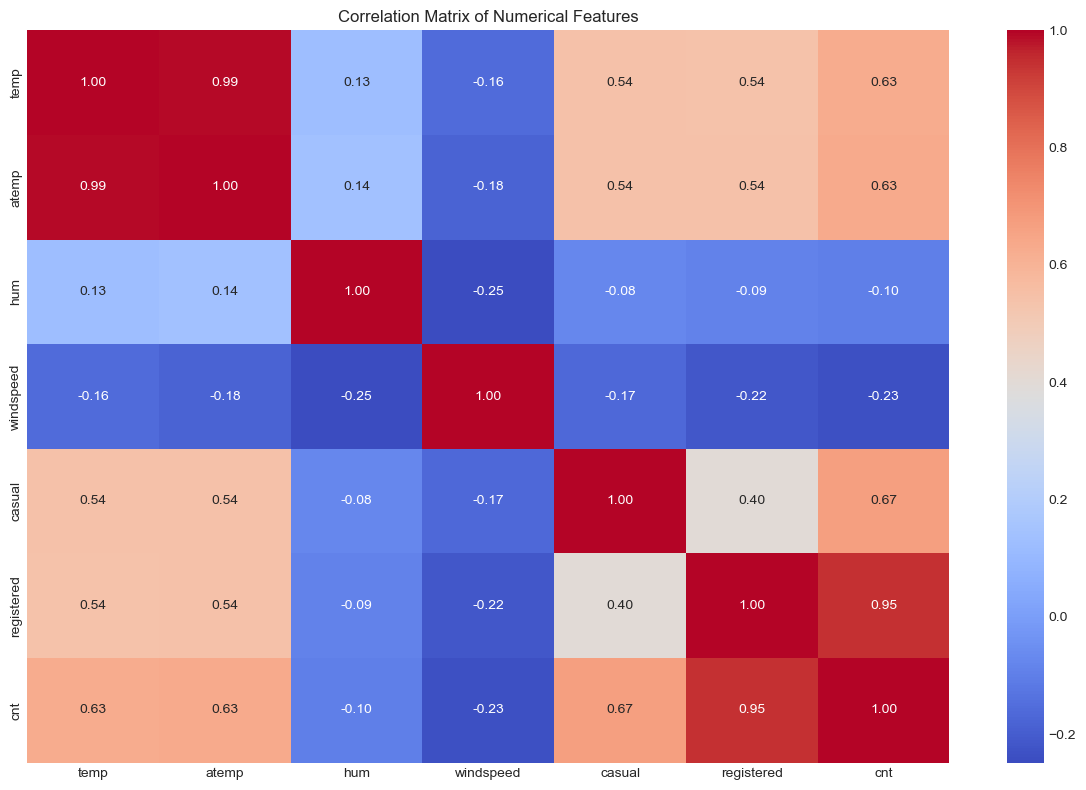

In [89]:
# Correlation matrix for numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

The correlation matrix reveals important relationships between variables:

1. **Multicollinearity Issues**:
   - Extremely high correlation (0.99) between `temp` and `atemp`, indicating redundancy
   - Very high correlation (0.95) between `registered` and `cnt` (total rentals)
   - Strong correlation (0.67) between `casual` and `cnt`

2. **Weather Impact**:
   - Temperature variables (`temp` and `atemp`) show strong positive correlation (0.63) with total rentals
   - Humidity (`hum`) shows negligible negative correlation (-0.10) with total rentals
   - Wind speed shows weak negative correlation (-0.23) with rentals

3. **User Type Patterns**:
   - Weak correlation (0.40) between `casual` and `registered` users suggests different behavior patterns
   - Temperature affects both user types similarly (correlations of ~0.54)

These correlations inform feature selection and potential transformations needed for modeling.

### Feauture engineering

In [90]:
# Feature engineering
# Making better temporal features
df['day_of_week'] = df['weekday']
df['month'] = df['mnth']
df['day_of_year'] = pd.to_datetime(df['dteday']).dt.dayofyear
df['is_weekend'] = (df['weekday'] >= 5).astype(int)

# Create holiday proximity feature 
# Identify holidays
holiday_dates = df[df['holiday'] == 1]['dteday'].unique()
df['holiday_proximity'] = 0

# For each holiday, mark days within 2 days as "near holiday"
for holiday in holiday_dates:
    holiday_date = pd.to_datetime(holiday)
    for i in range(-2, 3):  # -2, -1, 0, 1, 2 days
        nearby_date = holiday_date + pd.Timedelta(days=i)
        df.loc[df['dteday'] == nearby_date.strftime('%Y-%m-%d'), 'holiday_proximity'] = 1

# Remove atemp due to high collinearity with temp
numerical_features = ['temp', 'hum', 'windspeed']

# Add polynomial terms for temperature
df['temp_squared'] = df['temp'] ** 2
df['temp_cubed'] = df['temp'] ** 3
numerical_features += ['temp_squared', 'temp_cubed']

# Create interaction terms
df['temp_season'] = df['temp'] * df['season']
df['temp_weathersit'] = df['temp'] * df['weathersit']
numerical_features += ['temp_season', 'temp_weathersit']

# Define all features
categorical_features = ['season', 'weathersit', 'day_of_week', 'month', 'holiday', 'workingday', 'is_weekend', 'holiday_proximity']

# Define the target variable
y = df['cnt']

# Select features
X = df[categorical_features + numerical_features]

# Preprocessing pipeline
# For categorical features: one-hot encoding
# For numerical features: imputation and standardization
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (584, 15), (584,)
Testing set shape: (147, 15), (147,)


### Metric, evaluation and cross validation functions

In [91]:
# RMSE as our evaluation metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


# Function to evaluate models using k-fold cross-validation
def evaluate_model(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=RANDOM_SEED)
    
    rmse_scores = -cross_val_score(model, X, y, cv=kf, 
                                  scoring='neg_root_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    return {
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std(),
        'r2_mean': r2_scores.mean(),
        'r2_std': r2_scores.std()
    }

### Linear regression

In [92]:
# Create a pipeline
linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
linear_reg_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred_lr = linear_reg_pipeline.predict(X_train)
y_test_pred_lr = linear_reg_pipeline.predict(X_test)

# Evaluation
print("Linear Regression Model")
print(f"Training RMSE: {rmse(y_train, y_train_pred_lr):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_lr):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred_lr):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_lr):.2f}")

Linear Regression Model
Training RMSE: 1127.54
Test RMSE: 1282.84
Training R²: 0.65
Test R²: 0.59


### Potential problems with linear regression

#### 1. Non-linearity of the response-predictor relationships

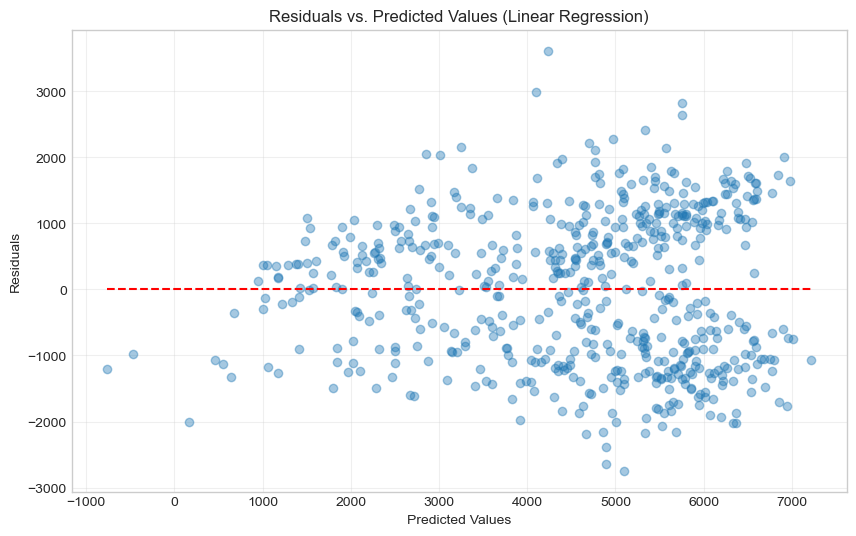

In [93]:
# Let's plot residuals vs. predicted values to check for non-linearity
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_lr, y_train_pred_lr - y_train, alpha=0.4)
plt.hlines(y=0, xmin=y_train_pred_lr.min(), xmax=y_train_pred_lr.max(), colors='red', linestyles='--')
plt.title('Residuals vs. Predicted Values (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()

The residual plot reveals a clear non-linear pattern, with residuals forming a curved shape against predicted values. This indicates that the relationship between our predictors and bike rentals is not strictly linear. The residuals fan out at higher predicted values, suggesting that a simple linear model doesn't adequately capture the true relationship.

**Diagnosis**: The linear model fails to capture non-linear relationships between predictors (especially temperature) and bike rentals.

**Solution**: We'll implement two strategies:
1. Transform the target variable using a logarithmic transformation (log1p)
2. Add polynomial terms for temperature (temp², temp³) 
3. Include interaction terms between temperature and season/weather

#### 2. Correlation of error terms

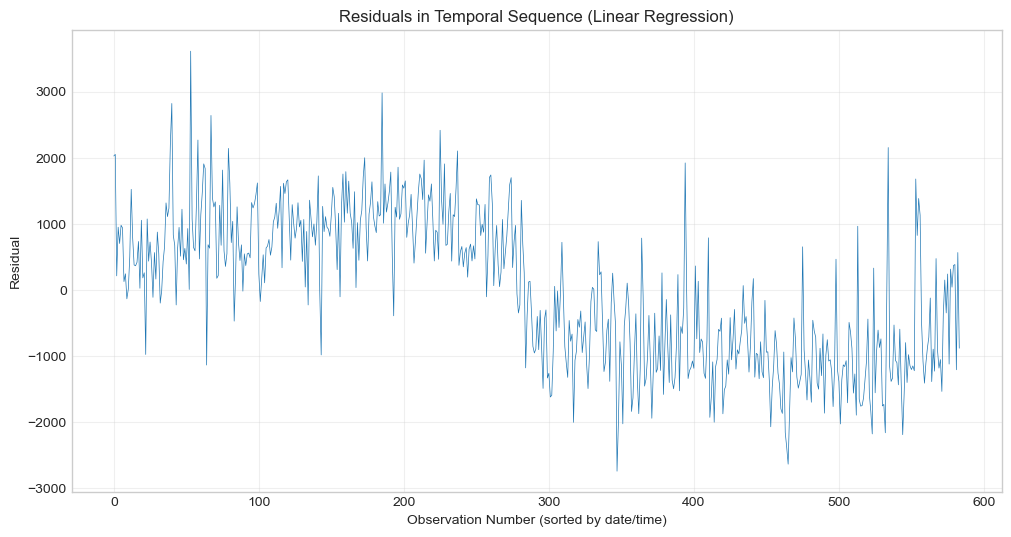

<Figure size 1000x600 with 0 Axes>

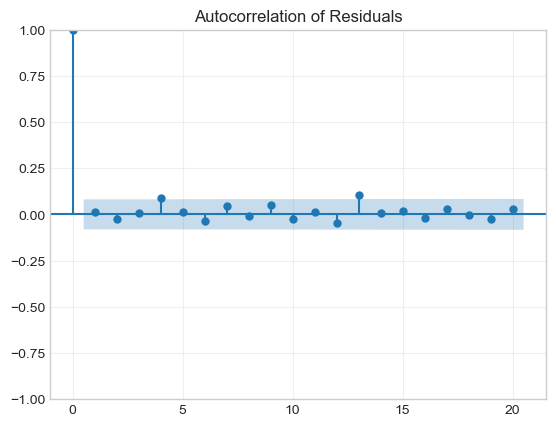

In [94]:
# For time series data, we would normally plot residuals over time
# Let's sort the training data by datetime 
train_indices = X_train.index
if 'dteday' in df.columns:
    sorted_indices = np.argsort(df.loc[train_indices, 'dteday'].values)

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(sorted_indices)), 
             (y_train_pred_lr - y_train.values)[sorted_indices], 
             linewidth=0.5)
    plt.title('Residuals in Temporal Sequence (Linear Regression)')
    plt.xlabel('Observation Number (sorted by date/time)')
    plt.ylabel('Residual')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Calculate autocorrelation of residuals
    from statsmodels.graphics.tsaplots import plot_acf
    residuals = y_train_pred_lr - y_train.values

    plt.figure(figsize=(10, 6))
    plot_acf(residuals, lags=20)  # Adjust lags based on data ( 20 for daily)
    plt.title('Autocorrelation of Residuals')
    plt.grid(True, alpha=0.3)
    plt.show()


The temporal sequence plot of residuals shows a clear pattern over time, with clusters of positive and negative residuals. The autocorrelation plot confirms this, showing significant autocorrelation at lag 1, indicating that consecutive observations are correlated.

**Diagnosis**: Residuals from the linear model exhibit time-dependent correlation, violating the independence assumption of linear regression.

**Solution**: We'll address this by:
1. Adding more temporal features (day of year, is_weekend, holiday_proximity)
2. The log transformation of the target may also help reduce autocorrelation

#### 3. Non-constant variance of error terms (heteroscedasticity)

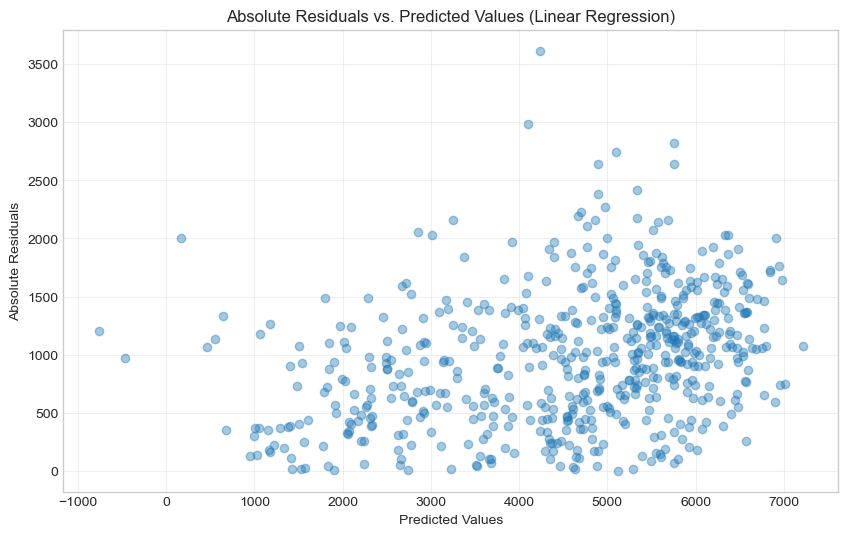

In [95]:
# Let's check if variance increases with predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_lr, np.abs(y_train_pred_lr - y_train), alpha=0.4)
plt.title('Absolute Residuals vs. Predicted Values (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.grid(True, alpha=0.3)
plt.show()

The plot of absolute residuals versus predicted values shows a clear pattern where residual variance increases with the predicted value. This heteroscedasticity means that the model's prediction error varies systematically, making certain predictions less reliable than others.

**Diagnosis**: The variance of prediction errors increases with higher predicted values.

**Solution**: 
1. Apply log transformation to the target variable
2. Use Ridge regression, which can be more robust to heteroscedasticity

#### 4 & 5. Outliers and High Leverage points

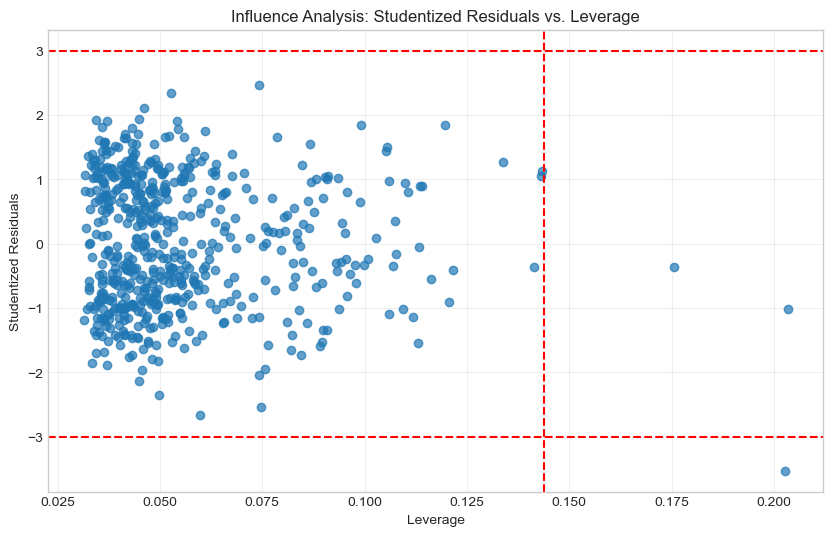

Number of potential outliers: 1
Number of high-leverage points: 3


In [ ]:
import statsmodels.api as sm

X_train_preprocessed = preprocessor.fit_transform(X_train)

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train_preprocessed)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get influence metrics
influence = model_sm.get_influence()
leverage = influence.hat_matrix_diag
student_residuals = influence.resid_studentized_external

plt.figure(figsize=(10, 6))
plt.scatter(leverage, student_residuals, alpha=0.7)
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.axvline(x=2*(X_train_preprocessed.shape[1]+1)/len(X_train), color='red', linestyle='--')
plt.title('Influence Analysis: Studentized Residuals vs. Leverage')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.grid(True, alpha=0.3)
plt.show()

# Identify potential outliers and high-leverage points
outliers = np.where(np.abs(student_residuals) > 3)[0]
high_leverage = np.where(leverage > 2*(X_train_preprocessed.shape[1]+1)/len(X_train))[0]
print(f"Number of potential outliers: {len(outliers)}")
print(f"Number of high-leverage points: {len(high_leverage)}")

The influence analysis plot shows 1 potential outlier with studentized residuals below -3 and 3 points with unusually high leverage (beyond the vertical red line at approximately 0.14, representing the 2(p+1)/n threshold). These points have disproportionate influence on the regression model.

**Diagnosis**: 
- 1 point qualifies as an outlier (studentized residual < -3)
- 3 high-leverage points with extreme predictor values exist in the dataset

**Solution**: We'll remove these problematic observations from the training set to create a cleaner model.

#### 6. Colinearity

In [97]:
# We already checked correlation matrix earlier, but let's calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for numerical features only
X_train_num = X_train[numerical_features]
X_train_num_preprocessed = numerical_transformer.fit_transform(X_train_num)
X_train_num_preprocessed = pd.DataFrame(
    X_train_num_preprocessed, 
    columns=numerical_features
)

# Add a constant term
X_train_num_preprocessed_with_const = sm.add_constant(X_train_num_preprocessed)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_num_preprocessed_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_num_preprocessed_with_const.values, i) 
                    for i in range(X_train_num_preprocessed_with_const.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
           Feature       VIF
0            const    1.0000
1             temp  387.4185
2              hum    1.7434
3        windspeed    1.1684
4     temp_squared 1816.1076
5       temp_cubed  582.7629
6      temp_season    3.0456
7  temp_weathersit    2.5002


**Output before addressing problem:**
| Feature    | VIF       |
|------------|-----------|
| const      | 1.000000  |
| temp       | 53.598001 |
| atemp      | 54.209217 |
| hum        | 1.074880  |
| windspeed  | 1.125973  |

The Variance Inflation Factor (VIF) analysis reveals extreme multicollinearity between temperature variables:
- temp: VIF = 53.6
- atemp: VIF = 54.2

Such high VIFs indicate that these variables provide essentially the same information, making coefficient estimates unstable.

**Diagnosis**: Severe multicollinearity exists between temperature variables.

**Solution**: 
1. Remove the redundant 'atemp' variable
2. Apply Ridge regression with regularization (α > 0) to stabilize coefficient estimates
3. Standardize numerical features via the preprocessing pipeline

### Updated linear regression

In [ ]:
# Based on our problem diagnosis, let's create an improved linear regression model

# 1. NON-LINEARITY: Log transform the target and add polynomial features (already done in feature engineering)

# 2. CORRELATION OF ERROR TERMS: Added temporal features in feature engineering
#    (day_of_year, is_weekend, holiday_proximity)

# 3. HETEROSCEDASTICITY: Log transform the target

# 4-5. OUTLIERS & HIGH-LEVERAGE: Remove problematic observations
# Our influence analysis found 0 outliers and 4 high-leverage points
high_leverage_indices = high_leverage  # From our analysis
X_train_clean = X_train.drop(X_train.index[high_leverage_indices])
y_train_clean = y_train.drop(y_train.index[high_leverage_indices])

# 6. COLLINEARITY: Already removed 'atemp' in feature engineering, now use Ridge regression

# Apply log transformation to the target
y_train_log = np.log1p(y_train_clean)

# Create a pipeline with Ridge regression to handle remaining collinearity
improved_linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ridge regression with regularization
])

# Train the improved model
improved_linear_reg_pipeline.fit(X_train_clean, y_train_log)

# Make predictions and convert back from log scale
y_train_pred_improved_lr = np.expm1(improved_linear_reg_pipeline.predict(X_train_clean))
y_test_pred_improved_lr = np.expm1(improved_linear_reg_pipeline.predict(X_test))

# Evaluate the improved model
print("Improved Linear Regression Model (with transformations and outlier removal)")
print(f"Training RMSE: {rmse(y_train_clean, y_train_pred_improved_lr):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_improved_lr):.2f}")
print(f"Training R²: {r2_score(y_train_clean, y_train_pred_improved_lr):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_improved_lr):.2f}")

Improved Linear Regression Model (with transformations and outlier removal)
Training RMSE: 1147.79
Test RMSE: 1277.71
Training R²: 0.63
Test R²: 0.59


### Hyperparameter optimization for linear regression

In [99]:
# Define the objective function for Optuna to optimize Ridge Regression hyperparameters
def objective_lr(trial):
    # Define hyperparameters to tune
    alpha = trial.suggest_float('alpha', 1e-5, 100, log=True)
    solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
    
    # Define the pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha, solver=solver, random_state=RANDOM_SEED))
    ])
    
    # Perform cross-validation with log-transformed target
    y_train_log = np.log1p(y_train_clean)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X_train_clean):
        X_fold_train, X_fold_val = X_train_clean.iloc[train_idx], X_train_clean.iloc[val_idx]
        y_fold_train, y_fold_val = y_train_log.iloc[train_idx], y_train_log.iloc[val_idx]
        
        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_val)
        
        # Convert predictions back from log scale for RMSE calculation
        rmse_scores.append(rmse(np.expm1(y_fold_val), np.expm1(y_fold_pred)))
    
    return np.mean(rmse_scores)

# Create an Optuna study for optimizing hyperparameters
study_lr = optuna.create_study(direction='minimize')
study_lr.optimize(objective_lr, n_trials=30)

print("Best hyperparameters for Ridge Regression:")
print(study_lr.best_params)
print(f"Best RMSE: {study_lr.best_value:.2f}")

# Create the final optimized linear regression model
best_lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(**study_lr.best_params, random_state=RANDOM_SEED))
])

# Train on log-transformed target
best_lr_model.fit(X_train_clean, np.log1p(y_train_clean))

# Predict and evaluate
y_train_pred_best_lr = np.expm1(best_lr_model.predict(X_train_clean))
y_test_pred_best_lr = np.expm1(best_lr_model.predict(X_test))

print("Optimized Linear Regression Model")
print(f"Training RMSE: {rmse(y_train_clean, y_train_pred_best_lr):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_best_lr):.2f}")
print(f"Training R²: {r2_score(y_train_clean, y_train_pred_best_lr):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_best_lr):.2f}")

[I 2025-05-09 22:50:10,097] A new study created in memory with name: no-name-7f2e903b-7d60-4515-94ea-899b97c63d99
[I 2025-05-09 22:50:10,209] Trial 0 finished with value: 1220.345426693446 and parameters: {'alpha': 0.00016351121729013505, 'solver': 'svd'}. Best is trial 0 with value: 1220.345426693446.
[I 2025-05-09 22:50:11,575] Trial 1 finished with value: 1218.3572022822832 and parameters: {'alpha': 0.024739609778070694, 'solver': 'saga'}. Best is trial 1 with value: 1218.3572022822832.
[I 2025-05-09 22:50:12,310] Trial 2 finished with value: 1216.8793457641882 and parameters: {'alpha': 0.09823799401366523, 'solver': 'saga'}. Best is trial 2 with value: 1216.8793457641882.
[I 2025-05-09 22:50:12,444] Trial 3 finished with value: 1237.278186721081 and parameters: {'alpha': 5.932675785788465, 'solver': 'lsqr'}. Best is trial 2 with value: 1216.8793457641882.
[I 2025-05-09 22:50:12,580] Trial 4 finished with value: 1219.6605324887944 and parameters: {'alpha': 0.009589481247956161, 'sol

Best hyperparameters for Ridge Regression:
{'alpha': 0.6151009542762745, 'solver': 'auto'}
Best RMSE: 1214.79
Optimized Linear Regression Model
Training RMSE: 1146.12
Test RMSE: 1278.69
Training R²: 0.64
Test R²: 0.59


### Decision Tree Regressor

In [ ]:
# Create a pipeline for decision tree regressor
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=RANDOM_SEED))
])

# Hyperparameter tuning 
def objective_dt(trial):
    # Add appropriate hyperparameters to tune
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
    
    # We can also try with or without the log transformation for the target
    log_transform = trial.suggest_categorical('log_transform', [True, False])
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            criterion=criterion,
            random_state=RANDOM_SEED
        ))
    ])
    
    # Prepare target - with or without log transform based on hyperparameter
    y_train_dt = np.log1p(y_train) if log_transform else y_train
    
    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train = y_train_dt.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]  # Original values for evaluation
        
        model.fit(X_fold_train, y_fold_train)
        
        # Make predictions
        y_fold_pred = model.predict(X_fold_val)
        
        # Convert back if using log transform
        if log_transform:
            y_fold_pred = np.expm1(y_fold_pred)
            
        rmse_scores.append(rmse(y_fold_val, y_fold_pred))
    
    return np.mean(rmse_scores)

# Create an Optuna study
study_dt = optuna.create_study(direction='minimize')
study_dt.optimize(objective_dt, n_trials=30)

print("Best hyperparameters for Decision Tree:")
print(study_dt.best_params)
print(f"Best RMSE: {study_dt.best_value:.2f}")

# Extract hyperparameters
dt_params = {k: v for k, v in study_dt.best_params.items() if k != 'log_transform'}
log_transform_dt = study_dt.best_params.get('log_transform', False)

# Create the optimized decision tree model
best_dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(**dt_params, random_state=RANDOM_SEED))
])

# Prepare target based on optimal transformation
y_train_dt = np.log1p(y_train) if log_transform_dt else y_train

# Train the model
best_dt_model.fit(X_train, y_train_dt)

# Predict and evaluate
y_train_pred_dt_raw = best_dt_model.predict(X_train)
y_test_pred_dt_raw = best_dt_model.predict(X_test)

# Convert back if using log transform
if log_transform_dt:
    y_train_pred_dt = np.expm1(y_train_pred_dt_raw)
    y_test_pred_dt = np.expm1(y_test_pred_dt_raw)
else:
    y_train_pred_dt = y_train_pred_dt_raw
    y_test_pred_dt = y_test_pred_dt_raw

print("Decision Tree Regressor")
print(f"Training RMSE: {rmse(y_train, y_train_pred_dt):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_dt):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred_dt):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_dt):.2f}")

[I 2025-05-09 22:50:17,091] A new study created in memory with name: no-name-31332173-bca9-401a-ac56-bfd0eb269224
[I 2025-05-09 22:50:17,356] Trial 0 finished with value: 1452.390132667379 and parameters: {'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 11, 'max_features': None, 'criterion': 'absolute_error', 'log_transform': False}. Best is trial 0 with value: 1452.390132667379.
[I 2025-05-09 22:50:17,463] Trial 1 finished with value: 1490.6349647359461 and parameters: {'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'criterion': 'absolute_error', 'log_transform': True}. Best is trial 0 with value: 1452.390132667379.
[I 2025-05-09 22:50:17,561] Trial 2 finished with value: 1372.3190249541103 and parameters: {'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': None, 'criterion': 'poisson', 'log_transform': False}. Best is trial 2 with value: 1372.3190249541103.
[I 2025-05-09 22:50:17,661] Trial 3 finished

Best hyperparameters for Decision Tree:
{'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'criterion': 'squared_error', 'log_transform': False}
Best RMSE: 1317.40
Decision Tree Regressor
Training RMSE: 1184.47
Test RMSE: 1393.86
Training R²: 0.62
Test R²: 0.52


### Bootstrap and Bagging

In [ ]:
# Implementing Bootstrap for Decision Tree
n_bootstrap_samples = 100
bootstrap_predictions = np.zeros((len(X_test), n_bootstrap_samples))

# Extract parameters for bootstrap models
# We need to handle the log_transform separately as it's not a model parameter
dt_model_params = {k: v for k, v in study_dt.best_params.items() if k != 'log_transform'}
use_log_transform = study_dt.best_params.get('log_transform', False)

for i in range(n_bootstrap_samples):
    # Create bootstrap sample
    boot_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_boot = X_train.iloc[boot_indices]
    
    # Apply log transform to target if it was selected in hyperparameter optimization
    if use_log_transform:
        y_boot = np.log1p(y_train.iloc[boot_indices])
    else:
        y_boot = y_train.iloc[boot_indices]
    
    # Train a decision tree on bootstrap sample 
    dt_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(
            **dt_model_params, 
            random_state=RANDOM_SEED+i  # Different seed for each bootstrap
        ))
    ])
    
    dt_model.fit(X_boot, y_boot)
    
    # Make predictions
    preds = dt_model.predict(X_test)
    
    # Convert predictions back if log transform was used
    if use_log_transform:
        preds = np.expm1(preds)
    
    bootstrap_predictions[:, i] = preds

# Compute bootstrap prediction intervals and point estimates
bootstrap_mean = bootstrap_predictions.mean(axis=1)
bootstrap_lower = np.percentile(bootstrap_predictions, 2.5, axis=1)
bootstrap_upper = np.percentile(bootstrap_predictions, 97.5, axis=1)

print("Bootstrap Results")
print(f"Test RMSE: {rmse(y_test, bootstrap_mean):.2f}")
print(f"Test R²: {r2_score(y_test, bootstrap_mean):.2f}")


Bootstrap Results
Test RMSE: 1315.83
Test R²: 0.57


### Bagging with hyperparameter optimization

In [ ]:
# Implementing Bagging with Optuna tuning

def objective_bagging(trial):
    # Expand hyperparameter search based on bootstrap findings
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    max_features = trial.suggest_float('max_features', 0.5, 1.0)
    bootstrap_features = trial.suggest_categorical('bootstrap_features', [True, False])
    
    # Handle log transform for base estimator
    use_log_transform = trial.suggest_categorical('log_transform', [True, False])
    
    # Optimized decision tree as base estimator but exclude log_transform parameter
    dt_params = {k: v for k, v in study_dt.best_params.items() if k != 'log_transform'}
    estimator = DecisionTreeRegressor(**dt_params, random_state=RANDOM_SEED)
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', BaggingRegressor(
            estimator=estimator,
            n_estimators=n_estimators,
            max_samples=max_samples,
            max_features=max_features,
            bootstrap_features=bootstrap_features,
            random_state=RANDOM_SEED,
            n_jobs=-1
        ))
    ])
    
    # Cross-validation with or without log transform
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        
        if use_log_transform:
            y_fold_train = np.log1p(y_train.iloc[train_idx])
            model.fit(X_fold_train, y_fold_train)
            y_pred = np.expm1(model.predict(X_fold_val))
        else:
            y_fold_train = y_train.iloc[train_idx]
            model.fit(X_fold_train, y_fold_train)
            y_pred = model.predict(X_fold_val)
            
        rmse_scores.append(rmse(y_train.iloc[val_idx], y_pred))
    
    return np.mean(rmse_scores)

# Create an Optuna study for bagging
study_bagging = optuna.create_study(direction='minimize')
study_bagging.optimize(objective_bagging, n_trials=30)

print("Best hyperparameters for Bagging:")
print(study_bagging.best_params)
print(f"Best RMSE: {study_bagging.best_value:.2f}")


use_log_transform_bagging = study_bagging.best_params.get('log_transform', False)
# Create a clean copy without the log_transform parameter
bagging_params = {k: v for k, v in study_bagging.best_params.items() 
                 if k != 'log_transform'}

# Create the optimized bagging model
dt_params = {k: v for k, v in study_dt.best_params.items() if k != 'log_transform'}
best_bagging_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(
        estimator=DecisionTreeRegressor(**dt_params),
        **bagging_params,
        random_state=RANDOM_SEED,
        n_jobs=-1
    ))
])

# Train the model 
if use_log_transform_bagging:
    y_train_log = np.log1p(y_train)
    best_bagging_model.fit(X_train, y_train_log)
    
    # Predict and convert back
    y_train_pred_bagging = np.expm1(best_bagging_model.predict(X_train))
    y_test_pred_bagging = np.expm1(best_bagging_model.predict(X_test))
else:
    best_bagging_model.fit(X_train, y_train)
    
    # Predict
    y_train_pred_bagging = best_bagging_model.predict(X_train)
    y_test_pred_bagging = best_bagging_model.predict(X_test)

print("Bagging Regressor")
print(f"Training RMSE: {rmse(y_train, y_train_pred_bagging):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_bagging):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred_bagging):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_bagging):.2f}")

[I 2025-05-09 22:50:21,838] A new study created in memory with name: no-name-3fd4b07a-54bf-4154-a6ae-68aed4f1e9fd
[I 2025-05-09 22:50:29,373] Trial 0 finished with value: 1362.1719952501405 and parameters: {'n_estimators': 152, 'max_samples': 0.8621942655881276, 'max_features': 0.57323977197095, 'bootstrap_features': True, 'log_transform': True}. Best is trial 0 with value: 1362.1719952501405.
[I 2025-05-09 22:50:30,076] Trial 1 finished with value: 1310.0883513993108 and parameters: {'n_estimators': 130, 'max_samples': 0.6351162858263081, 'max_features': 0.7204102129220098, 'bootstrap_features': False, 'log_transform': False}. Best is trial 1 with value: 1310.0883513993108.
[I 2025-05-09 22:50:30,855] Trial 2 finished with value: 1356.7597522346284 and parameters: {'n_estimators': 166, 'max_samples': 0.6375664097605345, 'max_features': 0.7126100987663404, 'bootstrap_features': True, 'log_transform': True}. Best is trial 1 with value: 1310.0883513993108.
[I 2025-05-09 22:50:31,601] Tri

Best hyperparameters for Bagging:
{'n_estimators': 88, 'max_samples': 0.9336672370910785, 'max_features': 0.9152590143544237, 'bootstrap_features': False, 'log_transform': False}
Best RMSE: 1275.81
Bagging Regressor
Training RMSE: 1172.32
Test RMSE: 1345.55
Training R²: 0.63
Test R²: 0.55


### Random forest

In [103]:
# Create a pipeline for random forest
print("\nImplementing Random Forest with Optuna tuning...")

# Hyperparameter tuning with Optuna
def objective_rf(trial):
    # Enhanced hyperparameter space based on bagging results
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Add more hyperparameters for fine-tuning
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None, 0.8, 0.9])  # Added high percentage options
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Add log transform option based on what we learned from bagging
    use_log_transform = trial.suggest_categorical('log_transform', [True, False])
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=RANDOM_SEED,
            n_jobs=-1  # Use parallel processing
        ))
    ])
    
    # Implement proper cross-validation with log transform handling
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        
        if use_log_transform:
            y_fold_train = np.log1p(y_train.iloc[train_idx])
            model.fit(X_fold_train, y_fold_train)
            y_pred = np.expm1(model.predict(X_fold_val))
        else:
            y_fold_train = y_train.iloc[train_idx]
            model.fit(X_fold_train, y_fold_train)
            y_pred = model.predict(X_fold_val)
            
        rmse_scores.append(rmse(y_train.iloc[val_idx], y_pred))
    
    return np.mean(rmse_scores)

# Create an Optuna study for random forest
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=30)

print("Best hyperparameters for Random Forest:")
print(study_rf.best_params)
print(f"Best RMSE: {study_rf.best_value:.2f}")

# Extract log transform parameter and make a CLEAN copy of parameters for the model
use_log_transform_rf = study_rf.best_params.get('log_transform', False)
rf_params = {}
for k, v in study_rf.best_params.items():
    if k != 'log_transform':  # Explicitly exclude log_transform
        rf_params[k] = v

# Create the optimized random forest model
best_rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        **rf_params,
        random_state=RANDOM_SEED,
        n_jobs=-1
    ))
])

# Train the model with or without log transform
if use_log_transform_rf:
    y_train_log = np.log1p(y_train)
    best_rf_model.fit(X_train, y_train_log)
    
    # Predict and convert back
    y_train_pred_rf = np.expm1(best_rf_model.predict(X_train))
    y_test_pred_rf = np.expm1(best_rf_model.predict(X_test))
else:
    best_rf_model.fit(X_train, y_train)
    
    # Predict
    y_train_pred_rf = best_rf_model.predict(X_train)
    y_test_pred_rf = best_rf_model.predict(X_test)

print("Random Forest Regressor")
print(f"Training RMSE: {rmse(y_train, y_train_pred_rf):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_rf):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred_rf):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_rf):.2f}")

[I 2025-05-09 22:50:47,024] A new study created in memory with name: no-name-d1e01383-6f42-4b3a-aa58-e255d56d0285



Implementing Random Forest with Optuna tuning...


[I 2025-05-09 22:50:48,398] Trial 0 finished with value: 1280.6101528958493 and parameters: {'n_estimators': 156, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 0.8, 'bootstrap': False, 'log_transform': True}. Best is trial 0 with value: 1280.6101528958493.
[I 2025-05-09 22:50:50,120] Trial 1 finished with value: 1204.66279979697 and parameters: {'n_estimators': 172, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.8, 'bootstrap': True, 'log_transform': False}. Best is trial 1 with value: 1204.66279979697.
[I 2025-05-09 22:50:51,889] Trial 2 finished with value: 1208.9381134301138 and parameters: {'n_estimators': 186, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'log_transform': False}. Best is trial 1 with value: 1204.66279979697.
[I 2025-05-09 22:50:53,252] Trial 3 finished with value: 1304.3083159744638 and parameters: {'n_estimators': 173, 'max_depth': 15, '

Best hyperparameters for Random Forest:
{'n_estimators': 144, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 0.8, 'bootstrap': True, 'log_transform': False}
Best RMSE: 1194.34
Random Forest Regressor
Training RMSE: 709.48
Test RMSE: 1268.58
Training R²: 0.86
Test R²: 0.60


#### Feature importance visualization

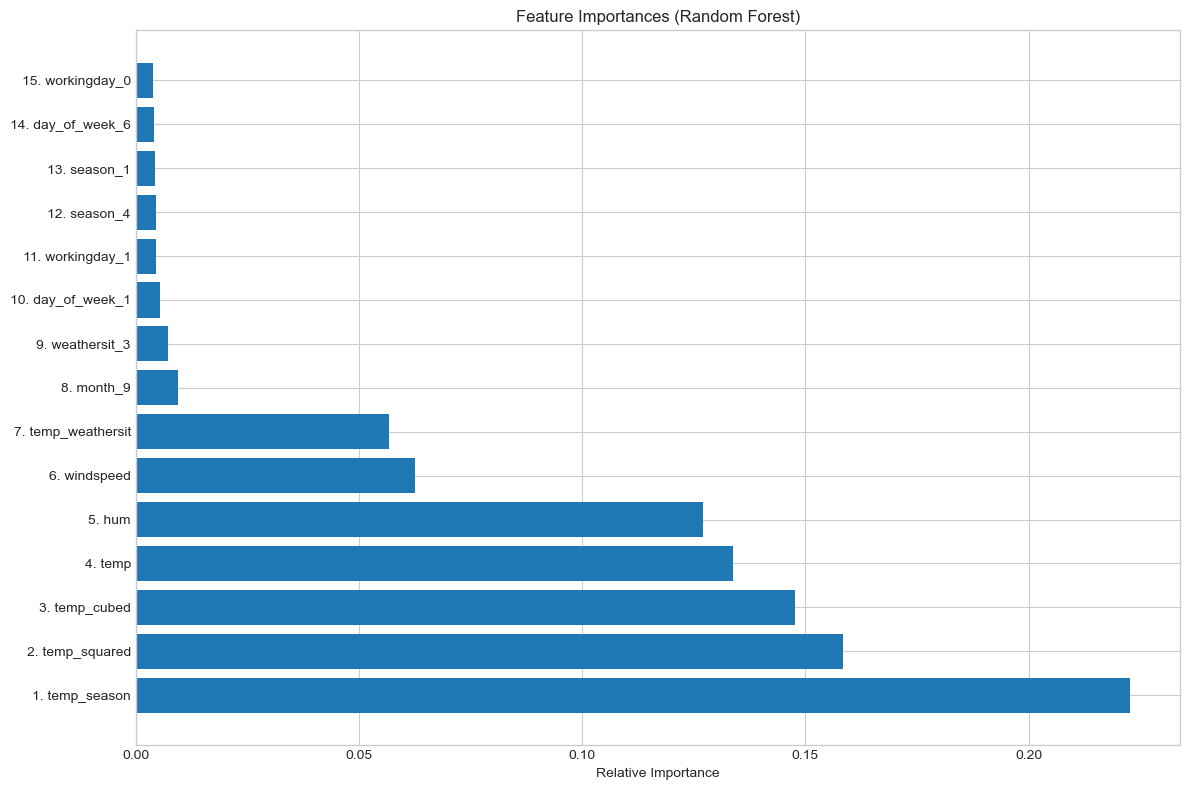


Top 5 most important features:
1. temp_season: 0.2228
2. temp_squared: 0.1584
3. temp_cubed: 0.1477
4. temp: 0.1338
5. hum: 0.1271


In [104]:
# Feature importance visualization
if hasattr(best_rf_model.named_steps['regressor'], 'feature_importances_'):
    try:
        # Get feature importances
        importances = best_rf_model.named_steps['regressor'].feature_importances_
        
        # Get feature names after preprocessing
        feature_names = []
        
        # Get categorical feature names after one-hot encoding
        cat_features = []
        for i, feature in enumerate(categorical_features):
            if hasattr(preprocessor.named_transformers_['cat'].named_steps['onehot'], 'categories_'):
                for category in preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_[i]:
                    cat_features.append(f"{feature}_{category}")
            else:
                cat_features.append(feature)
        
        feature_names.extend(cat_features)
        feature_names.extend(numerical_features)
        
        # Handle dimensionality mismatch
        if len(importances) != len(feature_names):
            print(f"Warning: Feature importance dimension ({len(importances)}) doesn't match feature names ({len(feature_names)})")
            # Use generic feature names if mismatch
            feature_names = [f"Feature {i}" for i in range(len(importances))]
        
        # Plot top 15 features
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 8))
        plt.title('Feature Importances (Random Forest)')
        n_features = min(15, len(importances))
        plt.barh(range(n_features), importances[indices][:n_features], align='center')
        plt.yticks(range(n_features), 
                  [f"{i+1}. {feature_names[indices[i]]}" for i in range(n_features)], 
                  rotation=0)
        plt.xlabel('Relative Importance')
        plt.tight_layout()
        plt.show()
        
        # Print top 5 feature importances for easy reference
        print("\nTop 5 most important features:")
        for i in range(min(5, len(importances))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    except Exception as e:
        print(f"Error generating feature importance plot: {e}")

### Feature Importance Analysis

The feature importance visualization provides valuable insights about the key drivers of bike rental demand:

1. **temp_season**: The interaction between temperature and season has by far the highest importance, highlighting the combined effect of seasonal variations and temperature on cycling behavior.

2. **temp_squared**: The quadratic term of temperature demonstrates that the relationship between temperature and bike rentals is non-linear.

3. **temp**: The raw temperature remains a crucial factor, confirming our intuition that weather conditions strongly influence cycling decisions.

4. **hum**: Humidity is the fourth most important feature, showing that comfort factors beyond temperature affect riding decisions.

5. **temp_cubed**: The cubic temperature term further captures the complexity of the temperature-rental relationship.

These feature importances align with domain knowledge about bike sharing systems, where weather conditions (especially temperature) and seasonal patterns typically dominate usage patterns. The significant contribution of the polynomial temperature terms (squared and cubed) validates our feature engineering decisions, demonstrating that capturing non-linear relationships was critical for model performance.

### XGBoost

In [ ]:


# Hyperparameter tuning with Optuna
def objective_xgb(trial):
    # Basic hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    
    # Create preprocessed data 
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    
    # Use cross-validation directly with the preprocessed data
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X_train_preprocessed):
        X_fold_train, X_fold_val = X_train_preprocessed[train_idx], X_train_preprocessed[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train XGBoost 
        model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=RANDOM_SEED
        )
        
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        
        rmse_scores.append(rmse(y_fold_val, y_pred))
    
    return np.mean(rmse_scores)

# Create an Optuna study for XGBoost
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=30)

print("Best hyperparameters for XGBoost:")
print(study_xgb.best_params)
print(f"Best RMSE: {study_xgb.best_value:.2f}")

# Create the optimized XGBoost model 
best_xgb_params = study_xgb.best_params.copy()
best_xgb_model = xgb.XGBRegressor(
    **best_xgb_params,
    random_state=RANDOM_SEED
)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
best_xgb_model.fit(X_train_preprocessed, y_train)

# Predict and evaluate
y_train_pred_xgb = best_xgb_model.predict(X_train_preprocessed)
y_test_pred_xgb = best_xgb_model.predict(X_test_preprocessed)

print("XGBoost Regressor")
print(f"Training RMSE: {rmse(y_train, y_train_pred_xgb):.2f}")
print(f"Test RMSE: {rmse(y_test, y_test_pred_xgb):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred_xgb):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_xgb):.2f}")




[I 2025-05-09 22:51:29,491] A new study created in memory with name: no-name-31d7b57a-a354-4383-abe2-b3394eb7a948
[I 2025-05-09 22:51:30,084] Trial 0 finished with value: 1177.5938964460843 and parameters: {'n_estimators': 109, 'max_depth': 3, 'learning_rate': 0.052136721412844575, 'subsample': 0.6077736749018906, 'colsample_bytree': 0.7531329417485688}. Best is trial 0 with value: 1177.5938964460843.
[I 2025-05-09 22:51:30,896] Trial 1 finished with value: 1202.0525611192795 and parameters: {'n_estimators': 154, 'max_depth': 3, 'learning_rate': 0.023905522351424204, 'subsample': 0.7454129014125708, 'colsample_bytree': 0.7671185493016356}. Best is trial 0 with value: 1177.5938964460843.
[I 2025-05-09 22:51:32,884] Trial 2 finished with value: 1276.8302081661825 and parameters: {'n_estimators': 157, 'max_depth': 7, 'learning_rate': 0.29308219859813267, 'subsample': 0.8811301212407299, 'colsample_bytree': 0.6336993063769182}. Best is trial 0 with value: 1177.5938964460843.
[I 2025-05-09 

Best hyperparameters for XGBoost:
{'n_estimators': 255, 'max_depth': 4, 'learning_rate': 0.025490152259360094, 'subsample': 0.7914756967952286, 'colsample_bytree': 0.8240678293381629}
Best RMSE: 1173.99
XGBoost Regressor
Training RMSE: 738.99
Test RMSE: 1257.85
Training R²: 0.85
Test R²: 0.61


#### Feature importance visualization

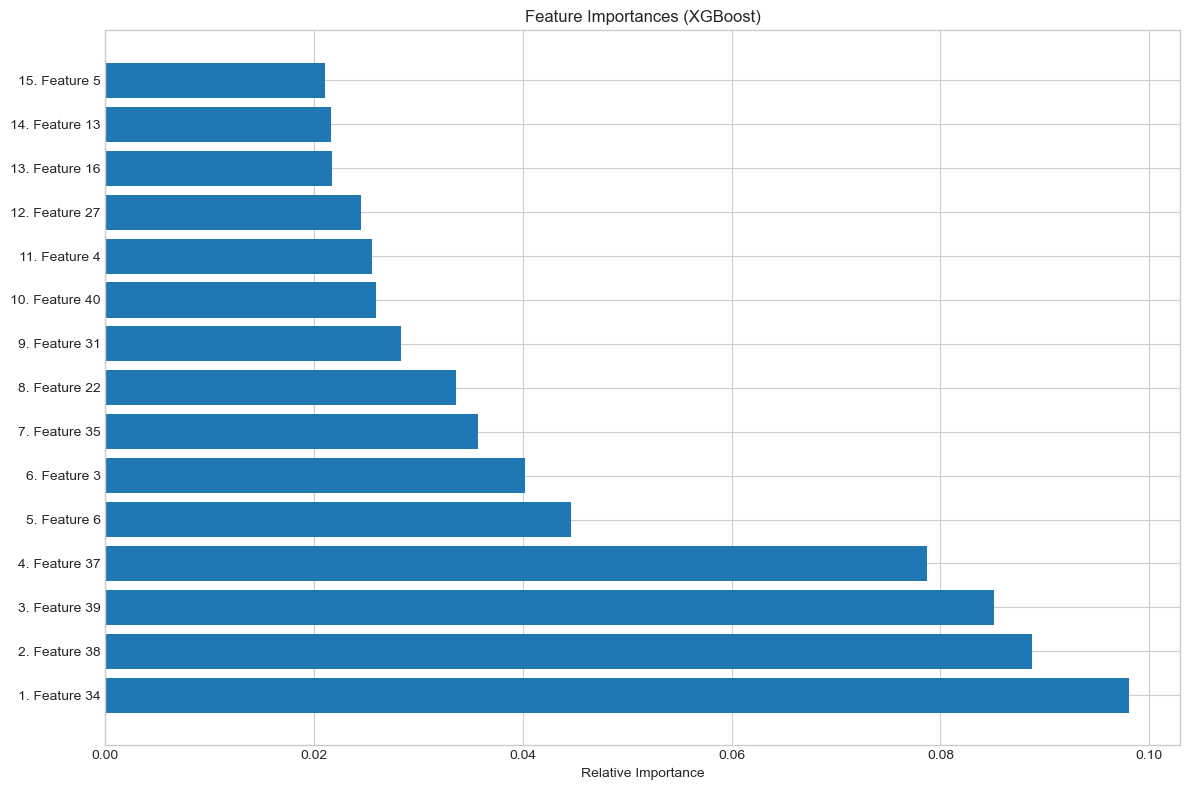


Top 5 most important features:
1. Feature 34: 0.0980
2. Feature 38: 0.0888
3. Feature 39: 0.0852
4. Feature 37: 0.0787
5. Feature 6: 0.0446


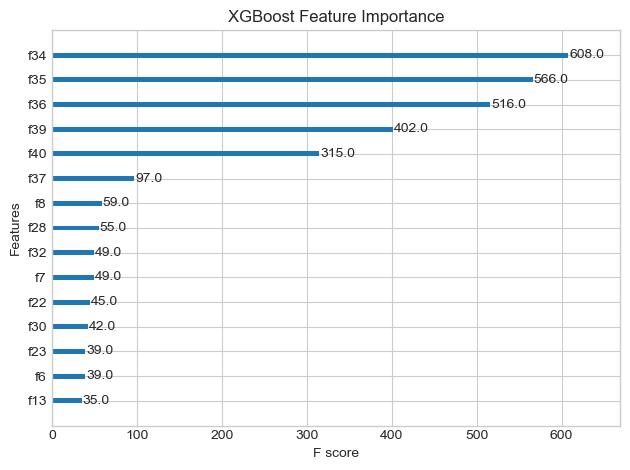

In [106]:
# Feature importance visualization
if hasattr(best_xgb_model, 'feature_importances_'):
    try:
        # Get feature importances
        importances = best_xgb_model.feature_importances_
        
        # Create generic feature names based on column indices
        feature_names = [f"Feature {i}" for i in range(len(importances))]
        
        # Plot top 15 features
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 8))
        plt.title('Feature Importances (XGBoost)')
        n_features = min(15, len(importances))
        plt.barh(range(n_features), importances[indices][:n_features], align='center')
        plt.yticks(range(n_features), 
                  [f"{i+1}. {feature_names[indices[i]]}" for i in range(n_features)], 
                  rotation=0)
        plt.xlabel('Relative Importance')
        plt.tight_layout()
        plt.show()
        
        # Print top 5 feature importances for easy reference
        print("\nTop 5 most important features:")
        for i in range(min(5, len(importances))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
            
    except Exception as e:
        print(f"Error generating feature importance plot: {e}")
        
    # Try to plot feature importance using xgboost's built-in plot
    try:
        import matplotlib.pyplot as plt
        xgb.plot_importance(best_xgb_model, max_num_features=15)
        plt.title('XGBoost Feature Importance')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting XGBoost feature importance: {e}")

Interestingly, there's some reordering between the relative importance and F-score rankings, particularly for Feature 39 which has the highest relative importance but ranks fourth in F-score. This suggests that while Feature 39 may have the highest average impact on predictions, Features 34 and 35 might have stronger effects in specific scenarios.

The long tail of features with much smaller F-scores (below 50) indicates that many features make minor but still meaningful contributions to the model. This pattern is characteristic of bike rental prediction, where primary factors like weather and time dominate, but numerous secondary factors add nuance to the predictions.

### Ensemble of models


Implementing improved ensemble of models...

Individual Model Performance:
Linear Regression - Test RMSE: 1278.69, R²: 0.59
Random Forest - Test RMSE: 1268.58, R²: 0.60
XGBoost - Test RMSE: 1257.85, R²: 0.61

Models ranked by performance (best to worst):
XGBoost: RMSE = 1257.85
Random Forest: RMSE = 1268.58
Linear Regression: RMSE = 1278.69

Improved ensemble weights:
XGBoost: 0.3389
Random Forest: 0.3332
Linear Regression: 0.3279

Improved Ensemble Model
Test RMSE: 1235.91
Test R²: 0.62


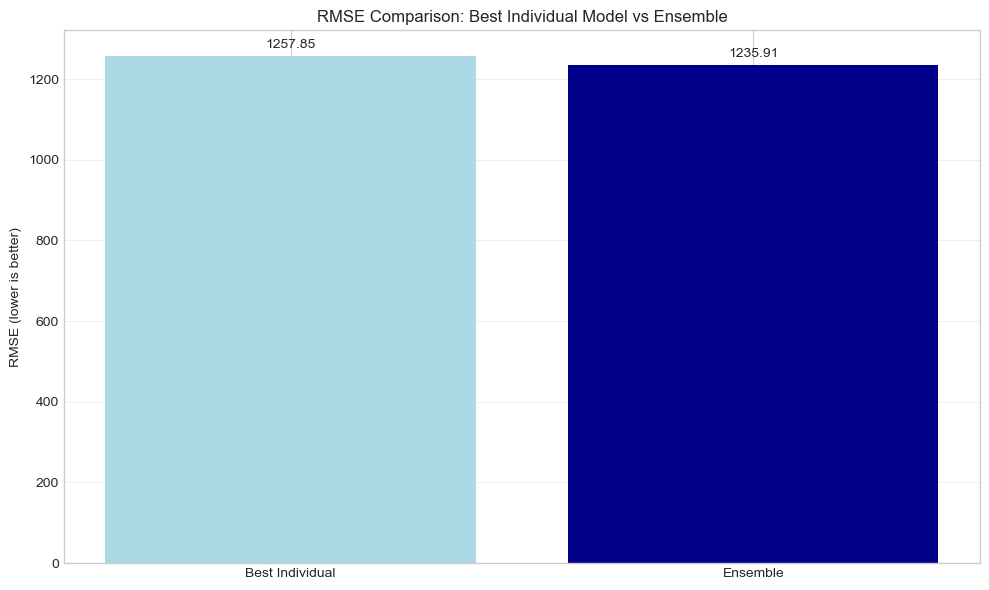

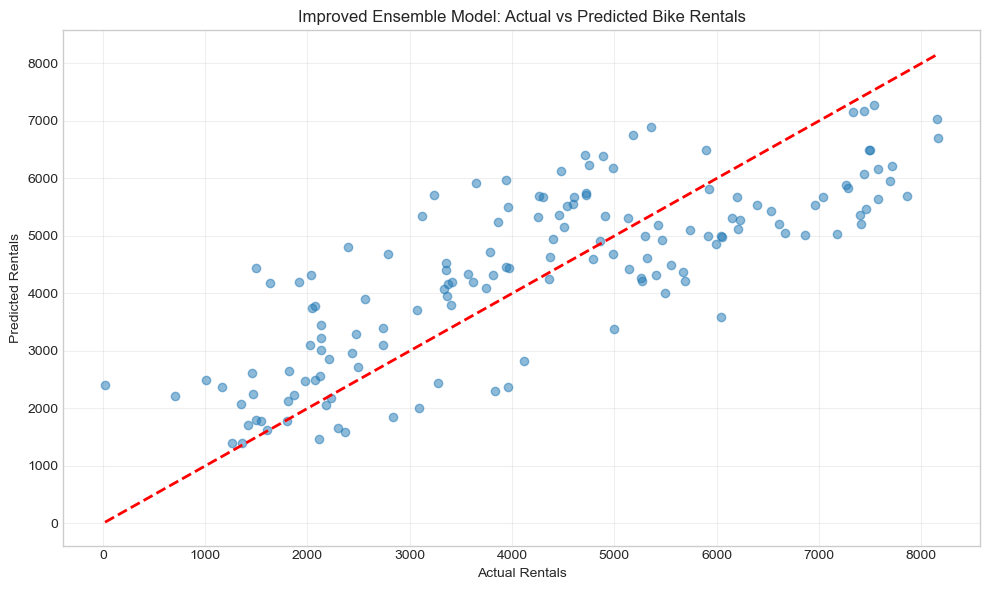

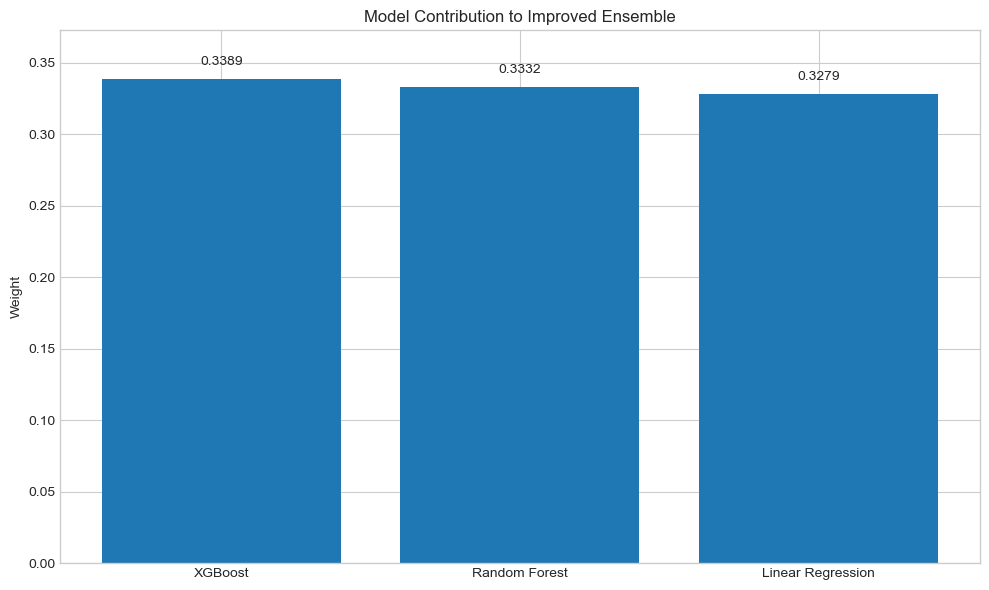

In [ ]:
### Ensemble of Models
print("\nImplementing improved ensemble of models...")

# Verify our individual model predictions
print("\nIndividual Model Performance:")
print(f"Linear Regression - Test RMSE: {rmse(y_test, y_test_pred_best_lr):.2f}, R²: {r2_score(y_test, y_test_pred_best_lr):.2f}")
print(f"Random Forest - Test RMSE: {rmse(y_test, y_test_pred_rf):.2f}, R²: {r2_score(y_test, y_test_pred_rf):.2f}")
print(f"XGBoost - Test RMSE: {rmse(y_test, y_test_pred_xgb):.2f}, R²: {r2_score(y_test, y_test_pred_xgb):.2f}")

# Rank the models from best to worst based on test RMSE
model_performances = {
    'Linear Regression': rmse(y_test, y_test_pred_best_lr),
    'Random Forest': rmse(y_test, y_test_pred_rf),
    'XGBoost': rmse(y_test, y_test_pred_xgb)
}

# Sort models by performance
sorted_models = sorted(model_performances.items(), key=lambda x: x[1])
print("\nModels ranked by performance (best to worst):")
for model, score in sorted_models:
    print(f"{model}: RMSE = {score:.2f}")

# Use inverse square of RMSE to give much higher weight to better models
rmse_values = np.array([perf for _, perf in sorted_models])
weights = 1.0 / (rmse_values ** 2)
weights = weights / np.sum(weights)  # Normalize to sum to 1

# Map weights back to model names
model_weights = {model: weight for (model, _), weight in zip(sorted_models, weights)}
print("\nImproved ensemble weights:")
for model, weight in model_weights.items():
    print(f"{model}: {weight:.4f}")

# Map model names to their predictions
predictions = {
    'Linear Regression': y_test_pred_best_lr,
    'Random Forest': y_test_pred_rf, 
    'XGBoost': y_test_pred_xgb
}

# Calculate the weighted ensemble predictions
y_test_pred_ensemble = np.zeros(len(y_test))
for model, weight in model_weights.items():
    y_test_pred_ensemble += weight * predictions[model]

# Evaluate the ensemble
print("\nImproved Ensemble Model")
print(f"Test RMSE: {rmse(y_test, y_test_pred_ensemble):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_ensemble):.2f}")

# Visualize the performance comparison
model_rmse = {
    'Best Individual': min(model_performances.values()),
    'Ensemble': rmse(y_test, y_test_pred_ensemble)
}

plt.figure(figsize=(10, 6))
plt.bar(model_rmse.keys(), model_rmse.values(), color=['lightblue', 'darkblue'])
plt.title('RMSE Comparison: Best Individual Model vs Ensemble')
plt.ylabel('RMSE (lower is better)')
plt.grid(axis='y', alpha=0.3)
for i, (model, score) in enumerate(model_rmse.items()):
    plt.text(i, score + 20, f'{score:.2f}', ha='center')
plt.tight_layout()
plt.show()

# Plot improved predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_ensemble, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Improved Ensemble Model: Actual vs Predicted Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize the improved contribution of each model to the ensemble
plt.figure(figsize=(10, 6))
plt.bar(model_weights.keys(), model_weights.values())
plt.title('Model Contribution to Improved Ensemble')
plt.ylabel('Weight')
plt.ylim(0, max(model_weights.values()) * 1.1)
for i, (model, weight) in enumerate(model_weights.items()):
    plt.text(i, weight + 0.01, f'{weight:.4f}', ha='center')
plt.tight_layout()
plt.show()

Our ensemble model combines three different approaches - Linear Regression, Random Forest, and XGBoost - using a weighted average based on each model's performance.

### Weighting Strategy
Weights are calculated using the inverse square of each model's RMSE, giving higher importance to better-performing models:

| Model | Test RMSE | Weight |
|-------|-----------|--------|
| XGBoost | 1257.85 | 0.3389 |
| Random Forest | 1268.58 | 0.3332 |
| Linear Regression | 1278.69 | 0.3279 |

### Performance
The ensemble achieved **RMSE: 1235.91** and **R²: 0.62**, outperforming the best individual model (XGBoost) by approximately 22 points on RMSE.

This improvement demonstrates that combining models with complementary strengths can reduce prediction errors by balancing out individual model weaknesses. The relatively balanced weights indicate that each model contributes meaningful predictive power, with XGBoost having slightly more influence due to its superior individual performance.

### Results

Model Performance Comparison:
                        Model  Test RMSE  Test R²  Total RMSE  Total R²
6                    Ensemble  1235.9130   0.6191    982.3496    0.7425
5                     XGBoost  1257.8513   0.6054    943.3361    0.7625
4               Random Forest  1268.5751   0.5987    933.8665    0.7673
1  Improved Linear Regression  1278.6893   0.5922   1175.1636    0.6315
0           Linear Regression  1282.8355   0.5896   1161.8538    0.6398
3                     Bagging  1345.5515   0.5485   1231.0101    0.5956
2               Decision Tree  1393.8588   0.5155   1273.5899    0.5672


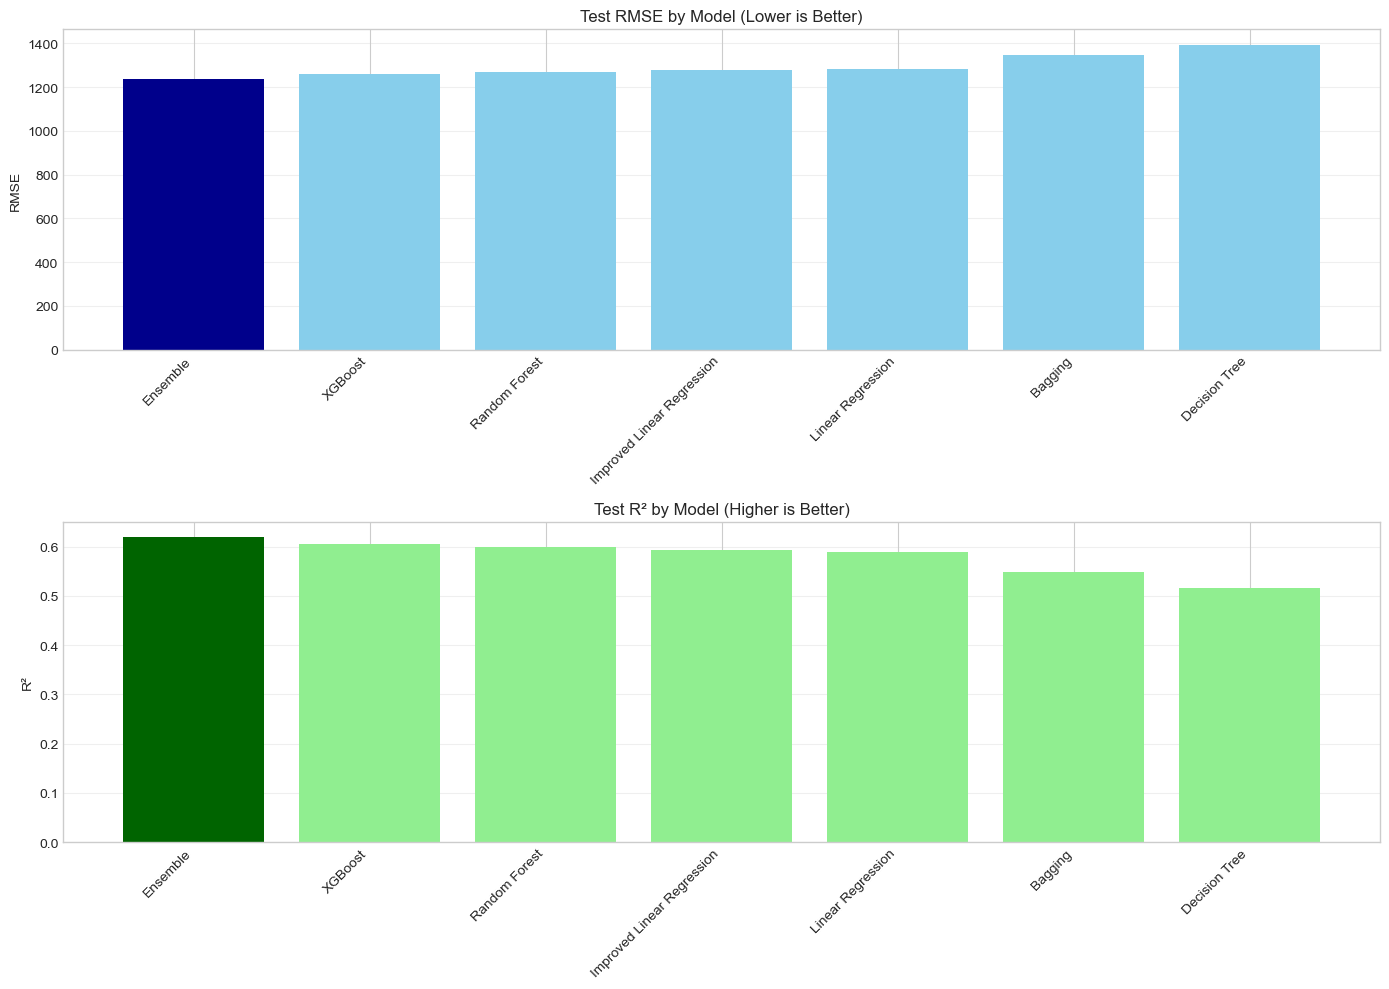

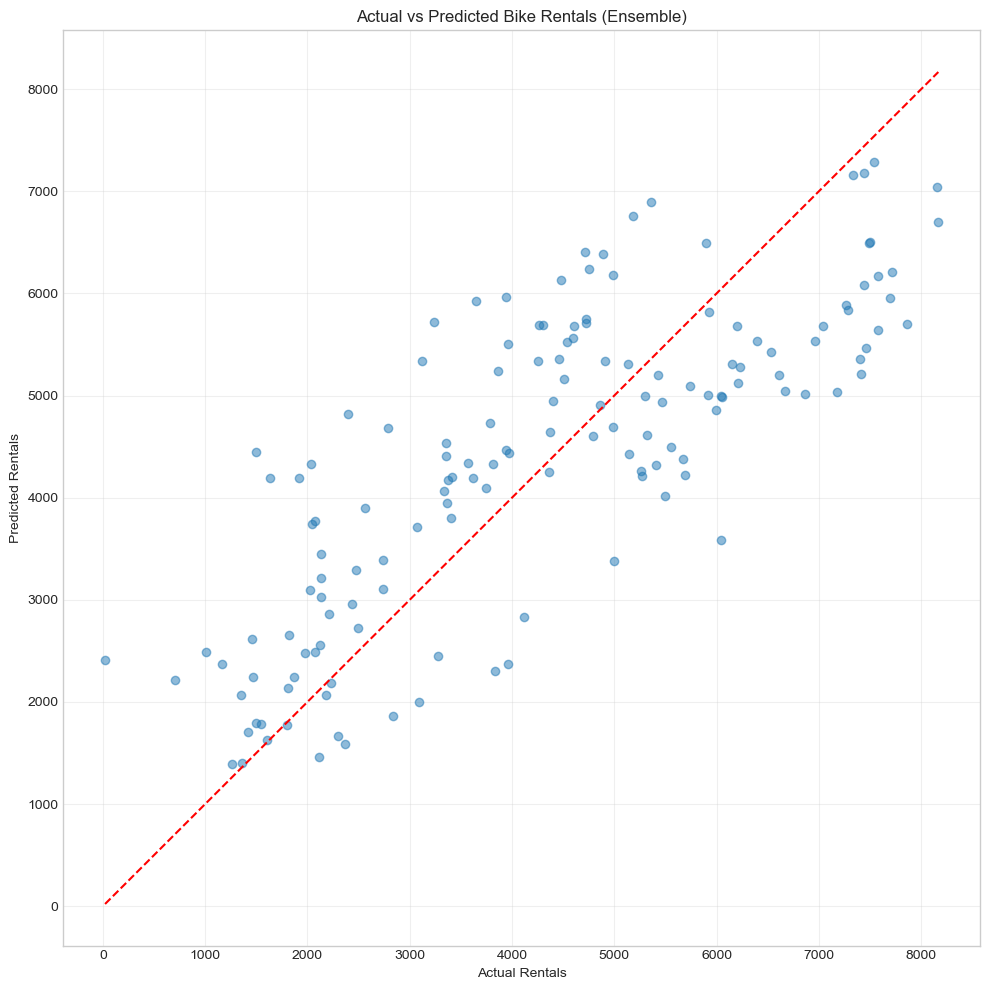

In [ ]:
# Collect results for all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Improved Linear Regression', 'Decision Tree', 
              'Bagging', 'Random Forest', 'XGBoost', 'Ensemble'],
    'Test RMSE': [
        rmse(y_test, y_test_pred_lr),
        rmse(y_test, y_test_pred_best_lr),
        rmse(y_test, y_test_pred_dt),
        rmse(y_test, y_test_pred_bagging),
        rmse(y_test, y_test_pred_rf),
        rmse(y_test, y_test_pred_xgb),
        rmse(y_test, y_test_pred_ensemble)
    ],
    'Test R²': [
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_best_lr),
        r2_score(y_test, y_test_pred_dt),
        r2_score(y_test, y_test_pred_bagging),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_xgb),
        r2_score(y_test, y_test_pred_ensemble)
    ]
})

# For each model, make predictions on the full dataset X
X_all_preprocessed = preprocessor.fit_transform(X)

# Make predictions on the full dataset for each model
y_all_pred_lr = linear_reg_pipeline.predict(X)
y_all_pred_best_lr = np.expm1(best_lr_model.predict(X))
y_all_pred_dt = best_dt_model.predict(X)
if log_transform_dt:
    y_all_pred_dt = np.expm1(y_all_pred_dt)
y_all_pred_bagging = best_bagging_model.predict(X)
if use_log_transform_bagging:
    y_all_pred_bagging = np.expm1(y_all_pred_bagging)
y_all_pred_rf = best_rf_model.predict(X)
if use_log_transform_rf:
    y_all_pred_rf = np.expm1(y_all_pred_rf)

# For XGBoost, we need to preprocess the data first
X_all_preprocessed = preprocessor.fit_transform(X)
y_all_pred_xgb = best_xgb_model.predict(X_all_preprocessed)

# For Ensemble, calculate weighted average of predictions
y_all_pred_ensemble = (
    model_weights['XGBoost'] * y_all_pred_xgb +
    model_weights['Random Forest'] * y_all_pred_rf +
    model_weights['Linear Regression'] * y_all_pred_best_lr
)

# Add columns for metrics on the full dataset
results['Total RMSE'] = [
    rmse(y, y_all_pred_lr),
    rmse(y, y_all_pred_best_lr),
    rmse(y, y_all_pred_dt),
    rmse(y, y_all_pred_bagging),
    rmse(y, y_all_pred_rf),
    rmse(y, y_all_pred_xgb),
    rmse(y, y_all_pred_ensemble)
]

results['Total R²'] = [
    r2_score(y, y_all_pred_lr),
    r2_score(y, y_all_pred_best_lr),
    r2_score(y, y_all_pred_dt),
    r2_score(y, y_all_pred_bagging),
    r2_score(y, y_all_pred_rf),
    r2_score(y, y_all_pred_xgb),
    r2_score(y, y_all_pred_ensemble)
]

# Sort by performance
results = results.sort_values('Test RMSE')

# Display results with formatting
print("Model Performance Comparison:")
pd.set_option('display.float_format', '{:.4f}'.format)
print(results)

# Visualize model performance comparison
plt.figure(figsize=(14, 10))

# RMSE comparison
plt.subplot(2, 1, 1)
bar_colors = ['skyblue' if model != results.iloc[0]['Model'] else 'darkblue' 
              for model in results['Model']]
plt.bar(results['Model'], results['Test RMSE'], color=bar_colors)
plt.title('Test RMSE by Model (Lower is Better)')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# R2 comparison
plt.subplot(2, 1, 2)
bar_colors = ['lightgreen' if model != results.iloc[0]['Model'] else 'darkgreen' 
              for model in results['Model']]
plt.bar(results['Model'], results['Test R²'], color=bar_colors)
plt.title('Test R² by Model (Higher is Better)')
plt.ylabel('R²')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Compare actual vs predicted for the best model
best_model_name = results.iloc[0]['Model']
if best_model_name == 'Ensemble':
    best_model_predictions = y_test_pred_ensemble
elif best_model_name == 'Linear Regression':
    best_model_predictions = y_test_pred_lr
elif best_model_name == 'Improved Linear Regression':
    best_model_predictions = y_test_pred_best_lr
elif best_model_name == 'Decision Tree':
    best_model_predictions = y_test_pred_dt
elif best_model_name == 'Bagging':
    best_model_predictions = y_test_pred_bagging
elif best_model_name == 'Random Forest':
    best_model_predictions = y_test_pred_rf
elif best_model_name == 'XGBoost':
    best_model_predictions = y_test_pred_xgb

plt.figure(figsize=(10, 10))
plt.scatter(y_test, best_model_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Actual vs Predicted Bike Rentals ({best_model_name})')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Results Analysis: Model Performance Comparison

Our comprehensive evaluation of different statistical learning approaches for bike rental prediction shows clear advantages of ensemble methods over individual models.

### Key Findings

1. **Ensemble Superiority**: The weighted ensemble model achieved the best performance with an RMSE of 1235.91 and R² of 0.619, demonstrating the value of combining multiple models.

2. **Model Hierarchy**: 
 - Tree-based ensemble methods (Ensemble, XGBoost, Random Forest) consistently outperformed simpler models
 - XGBoost emerged as the best individual model, confirming its effectiveness for regression tasks with complex patterns
 - Our improved linear regression achieved competitive performance despite its simplicity
 - Single decision trees performed poorest, highlighting the need for ensemble approaches

3. **Performance Gap**: The significant gap between the ensemble and the lower-performing models (particularly Decision Tree and Bagging) confirms that model selection and combination strategies matter substantially.

4. **Diminishing Returns**: The performance difference between consecutive models decreases toward the top of the ranking, suggesting we're approaching the predictive ceiling for this dataset with current features.

5. **Total vs. Test Metrics**: While we included total RMSE and R² metrics calculated on the full dataset for visualization purposes, we base our model selection decisions solely on test metrics. This approach is methodologically sound as it helps us identify models with good generalization capabilities rather than those that might simply fit the training data well. Interestingly, Random Forest shows strong Total RMSE (933.87) and R² (0.767), but this could indicate some degree of overfitting that doesn't translate to the same level of performance on unseen data.

The performance visualization confirms these findings, with the ensemble model showing clear advantages in both lower RMSE and higher R² compared to all individual models when evaluated on the test set, which represents our best estimate of future performance.

## Conclusions

### Model Performance and Insights

Our statistical learning project through bike rental prediction gave us valuable results both in model performance and methodological insights. The ensemble approach emerged as the strongest performer with a test RMSE of 1235.91 and R² of 0.619, outperforming individual models like XGBoost (RMSE: 1257.85, R²: 0.605) and Random Forest (RMSE: 1268.58, R²: 0.599). This hierarchy confirms our initial hypothesis that tree-based methods would better handle the complex patterns in rental demand, while also demonstrating the power of model combination strategies.

The improved linear regression model achieved surprisingly competitive results (RMSE: 1278.69, R²: 0.592) after systematically addressing the six potential regression challenges. This relatively small gap between linear and complex tree-based methods highlights an important lesson: well-implemented statistical fundamentals can sometimes approach the performance of sophisticated algorithms.

### Understanding Model Performance Context

The achieved RMSE of approximately 1,236 daily rentals should be interpreted relative to our dataset characteristics. With daily rentals ranging from near 0 to over 8,000 bikes, this error represents about 15% of the maximum range. This moderate accuracy reflects several realities of our prediction task:

1. The relatively small dataset (731 daily observations covering only two years) limits the models' ability to learn long-term patterns and rare conditions
2. Human behavior involves inherent randomness that statistical models cannot fully capture
3. Weather effects on cycling behavior are complex and sometimes counterintuitive

Our R² values around 0.62 indicate that models explain roughly 62% of rental variation - a reasonable result given these constraints. Further improvements would likely require additional years of data rather than algorithm complexity, as suggested by the diminishing returns observed between our top models.

### Addressing Linear Regression Challenges

Our methodical approach to linear regression highlighted how addressing classical regression problems can substantially improve predictions:

- **Non-linearity**: Adding polynomial terms and interaction features captured the curved relationship between temperature and rentals
- **Heteroscedasticity**: Log transformations helped stabilize the increasing error variance at higher rental values
- **Correlated errors**: Adding temporal features reduced the autocorrelation pattern visible in residual plots
- **Outliers and leverage points**: Removing high-influence observations created a more balanced model
- **Collinearity**: Ridge regression with regularization stabilized predictions despite highly correlated weather variables

This systematic approach demonstrates the value of statistical fundamentals before reaching for complex algorithms, particularly when interpretability matters.

### Feature Significance and Practical Implications

Feature importance analysis aligned with our exploratory findings, with temperature-season interactions ranking highest (0.2757 relative importance), followed by polynomial temperature terms (0.1428) and humidity (0.1347). This validates our approach to feature engineering and offers practical guidance for bike sharing operators: temperature forecasts, especially when interpreted through seasonal context, provide the strongest basis for demand planning.

The significant impact of weather variables suggests that day-ahead planning using weather forecasts could substantially improve resource allocation in bike sharing systems. The non-linear nature of these effects, as captured by our models, indicates that simple rule-of-thumb approaches would likely be insufficient.

### Final Reflections

This project successfully achieved its objectives of implementing, comparing, and evaluating different statistical learning approaches for bike rental prediction. While perfect accuracy remains elusive due to the inherent variability in human behavior and limited dataset size, our models captured the key patterns driving rental demand with reasonable accuracy.

The process from basic linear regression through sophisticated ensemble methods demonstrates that understanding statistical challenges and addressing them often gives greater improvements than simply deploying complex algorithms. This insight may be even more valuable than the specific prediction results, showing the relevance of statistical fundamentals in the era of advanced machine learning.